In [1]:
import musicntd.scripts.hide_code as hide

C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# From padding to subdivision

As evoked in the 1st notebook, in previous experiments, every bar of the tensor was zero-padded if it was shorter than the longest bar of the song.

This fix is not satisfactory, as it creates null artifacts at the end of most of the slices of the tensor.

## Description of the subdivision method

Instead, we decided to over-sample the chromagram (32-sample hop) and then select the same number of frames in each bar. This way, rather than having equally spaced frames in all bars of the tensor which resulted in slices of the tensor of inequal sizes (before padding), it now computes bar-chromagrams of the same number of frames, which is a parameter to be set. In each bar-chromagram, frames are almost* equally spaced, but the gap between two consecutive frames in two different bars can now be different.

We call **subdivision** of bars the number of frames we select in each bar. This parameter is to be set, and we will try to evaluate a good parameter in the next part of this notebook.

Concretely, let's consider the chromagram of a particular bar, starting at time $t_0$ and ending at time $t_1$. This chromagram contains $n = (t_1 - t_0 + 1) * \frac{s_r}{32}$ frames, with $s_r$ the sampling rate. In this chromagram, given a subdivision $sub$, we will select frame at indexes $\{k * \frac{n}{sub}$ for $k \in [0, sub[$ and $k$ integer $\}$. As indexes need to be integers, we need to round the precedent expression.

*almost, because of the rounding operation presented above

# Setting the subdivision parameter

We will test three values for the subdivision parameter:
 - 96 (24 beats per bar),
 - 128 (32 beats per bar),
 - 192 (48 beats per bar).
 
We will test the segmentation on the entire RWC Popular dataset, with MIREX10 annotations, and by testing several ranks (16,24,32,40) for $H$ and $Q$.

Note that, due to the conclusion in Notebook 2, we now have fixed $W$ to the 12-size identity matrix.

In [2]:
# On définit le type d'annotations
annotations_type = "MIREX10"
ranks_rhythm = [16,24,32,40]
ranks_pattern = [16,24,32,40]

## Subdivision 96

### Fixed ranks

Below are segmentation results with the subdivision fixed to 96, for the different ranks values, on the RWC Pop dataset.

Results are computed with tolerance of respectively 0.5 seconds and 3 seconds. 

In [3]:
zero_five_nine, three_nine = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "chromas", annotations_type = annotations_type,
                                                  subdivision=96, penalty_weight = 1)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


### Oracle ranks

In this condition, we only keep the ranks leading to the highest F measure.

In that sense, it's an optimistic upper bound on metrics.

In [4]:
hide.printmd("**A 0.5 secondes:**")
best_chr_zero_five = hide.best_f_one_score_rank(zero_five_nine)
hide.printmd("**A 3 secondes:**")
best_chr_three = hide.best_f_one_score_rank(three_nine)

**A 0.5 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,11.8,4.48,7.01,0.7305,0.6334,0.6716


**A 3 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,13.53,2.69,5.28,0.8421,0.7258,0.7729


Below is presented the distribution of the optimal ranks in the "oracle ranks" condition, _i.e._ the distribution of the ranks for $H$ and $Q$ which result in the highest F measure for the different songs.

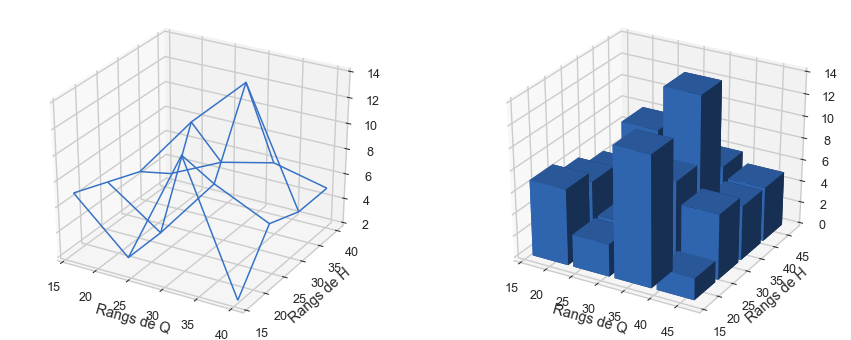

In [5]:
hide.plot_3d_ranks_study(zero_five_nine, ranks_rhythm, ranks_pattern)

Below is shown the distribution histogram of the F measure obtained with the oracle ranks.

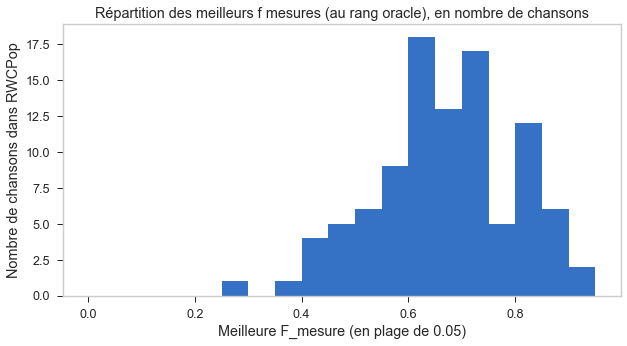

In [6]:
hide.plot_f_mes_histogram(zero_five_nine)

Finally, here are displayed the 5 worst songs in term of F measure in this condition.

In [7]:
hide.return_worst_songs(zero_five_nine, 5)

[('77.wav', 0.2857),
 ('51.wav', 0.359),
 ('98.wav', 0.4),
 ('63.wav', 0.4242),
 ('50.wav', 0.4324)]

## Subdivision 128

### Fixed ranks

Below are segmentation results with the subdivision fixed to 128, for the different ranks values, on the RWC Pop dataset.

Results are computed with tolerance of respectively 0.5 seconds and 3 seconds. 

In [8]:
zero_five_cent, three_cent = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "chromas", annotations_type = annotations_type,
                                                  subdivision=128, penalty_weight = 1)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


### Oracle ranks

In this condition, we only keep the ranks leading to the highest F measure.

In that sense, it's an optimistic upper bound.

In [9]:
hide.printmd("**A 0.5 secondes:**")
best_chr_zero_five = hide.best_f_one_score_rank(zero_five_cent)
hide.printmd("**A 3 secondes:**")
best_chr_three = hide.best_f_one_score_rank(three_cent)

**A 0.5 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,11.68,4.55,7.13,0.7253,0.6272,0.6646


**A 3 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,13.43,2.7,5.38,0.839,0.7218,0.7676


Below is presented the distribution of the optimal ranks in the "oracle ranks" condition, _i.e._ the distribution of the ranks for $H$ and $Q$ which result in the highest F measure for the different songs.

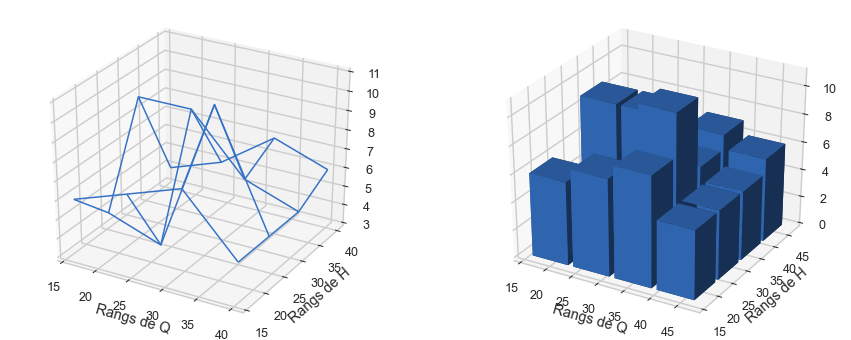

In [10]:
hide.plot_3d_ranks_study(zero_five_cent, ranks_rhythm, ranks_pattern)

Below is shown the distribution histogram of the F measure obtained with the oracle ranks.

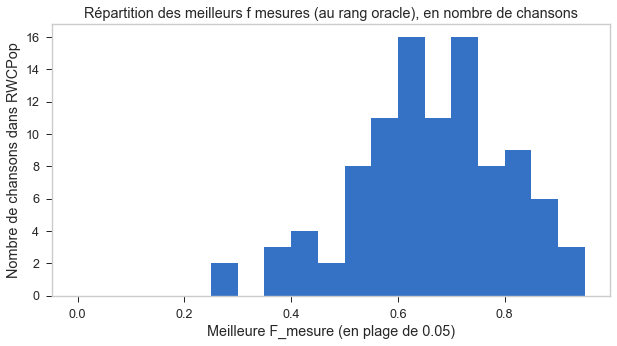

In [11]:
hide.plot_f_mes_histogram(zero_five_cent)

Finally, here are displayed the 5 worst songs in term of F measure in this condition.

In [12]:
hide.return_worst_songs(zero_five_cent, 5)

[('77.wav', 0.2857),
 ('51.wav', 0.359),
 ('71.wav', 0.2778),
 ('63.wav', 0.375),
 ('50.wav', 0.3784)]

## Subdivision 192

### Fixed ranks

Below are segmentation results with the subdivision fixed to 192, for the different ranks values, on the RWC Pop dataset.

Results are computed with tolerance of respectively 0.5 seconds and 3 seconds. 

In [13]:
zero_five_hunnine, three_hunnine = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "chromas", annotations_type = annotations_type,
                                                  subdivision=192, penalty_weight = 1)

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


### Oracle ranks

In this condition, we only keep the ranks leading to the highest F measure.

In that sense, it's an optimistic upper bound.

In [14]:
hide.printmd("**A 0.5 secondes:**")
best_chr_zero_five = hide.best_f_one_score_rank(zero_five_hunnine)
hide.printmd("**A 3 secondes:**")
best_chr_three = hide.best_f_one_score_rank(three_hunnine)

**A 0.5 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,11.67,4.5,7.14,0.727,0.6267,0.6656


**A 3 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,13.5,2.64,5.31,0.8451,0.725,0.7721


Below is presented the distribution of the optimal ranks in the "oracle ranks" condition, _i.e._ the distribution of the ranks for $H$ and $Q$ which result in the highest F measure for the different songs.

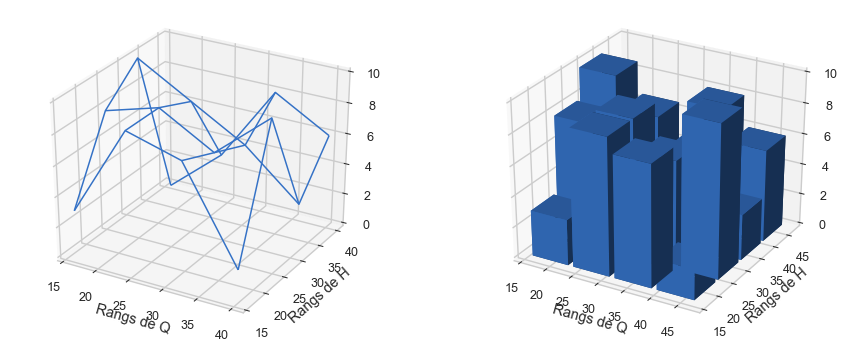

In [15]:
hide.plot_3d_ranks_study(zero_five_hunnine, ranks_rhythm, ranks_pattern)

Below is shown the distribution histogram of the F measure obtained with the oracle ranks.

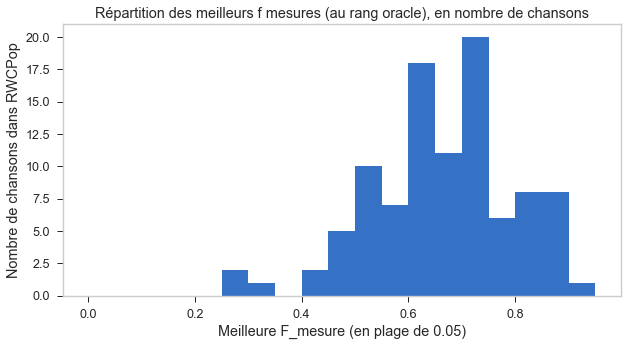

In [16]:
hide.plot_f_mes_histogram(zero_five_hunnine)

Finally, here are displayed the 5 worst songs in term of F measure in this condition.

In [17]:
hide.return_worst_songs(zero_five_hunnine, 5)

[('51.wav', 0.3333),
 ('77.wav', 0.2857),
 ('71.wav', 0.2857),
 ('63.wav', 0.4118),
 ('34.wav', 0.4375)]

# Conclusion

We didn't find the difference in the segmentation results to be significative.

In that sense, we concluded that the three tested subdivisions were equally satisfying for our experiments, and we decided to pursue with the **96** subdivision only, in order to reduce computation time and complexity, as it is the smallest tested value.

96 also presents the advantage (compared to 128) to be divisible by 3 and 4, which are the most common number of beats per bar in western pop music (even if, for now, we have restricted our study to music with 4 beats per bar).